In [17]:
from getpass import getpass
import os

secret = getpass('Enter the openai api key')
os.environ["OPENAI_API_KEY"] = secret

Enter the openai api key··········


**실습 (프롬프트 제출 필요)**

위와 같이 (업무와 관련된) 분기 처리가 필요한 태스크를 정의, 이 태스크를 수행하기 위한 프롬프트를 스스로 작성하고, 작성한 프롬프트를 기반으로 프롬프트 생성, 예시문을 1) 스스로 작성 2) 예시문 생성 후 평가하고, 스스로 작성한 프롬프트와 Claude 가 작성한 프롬프트의 답변 결과를 비교해보세요.

예시 태스크) 사용자가 입력한 질문을 수학 선생님께 전달해야 할지, 사회 선생님께 전달해야 할지, 둘 다 애매해서 사람이 직접 보고 판단해야 할지 판단
- 직접 작성한 프롬프트와 Claude 가 변환한 프롬프트를 비교
- 직접 작성한 예시와 Claude 가 작성한 예시를 비교
- 직접 작성한 프롬프트를 실행할 때와 Claude 가 작성한 프롬프트를 실행했을 때의 답변 확인 및 평가, 결과 비교

## 실습1
### 사진 캡쳐
- https://drive.google.com/file/d/1qqw1w9Z4mN9z_sia-iaCHCE2ZuJA20ks/view?usp=drive_link

# **Prompt Compression**

Demo site의 예시 prompt 를 compression 라이브러리를 사용하지 않고, 프롬프트 엔지니어링을 이용해 개선해보세요.

Demo 프로그램을 이용해 compression 해보세요

Demo
https://huggingface.co/spaces/microsoft/llmlingua-2

Install https://github.com/microsoft/LLMLingua?tab=readme-ov-file#1-installing-llmlingua

Change runtime type (from CPU to T4 GPU)

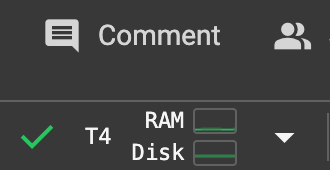

Compressed prompt 를 수작업으로 복사 붙여넣지 않아도 되도록, OpenAI API 와 Ollama 의 llama 실행 코드와 결합해보세요.

## 실습2-1

### 데모 프롬프트를 프롬프트 엔지니어링으로 개선
#### Demo.
```
John: So, um, I've been thinking about the project, you know, and I believe we need to, uh, make some changes. I mean, we want the project to succeed, right? So, like, I think we should consider maybe revising the timeline.
Sarah: I totally agree, John. I mean, we have to be realistic, you know. The timeline is, like, too tight. You know what I mean? We should definitely extend it.
```

#### Demo (개선)
- 문장을 요약하는 예시인데, 직접 불필요해 보이는 문장들을 삭제(Um, I, what i mean? 등등)
- 결과가 동일하게 나오는지 확인은 ChatGPT로 확인


```
John: I've been thinking about the project, I believe we need to, make some changes. we want the project to succeed, right? So, like, I think we should consider maybe revising the timeline.
Sarah: I totally agree, John. we have to be realistic, The timeline is, like, too tight. We should definitely extend it.
```

```
Question: What does Sarah think about the timeline?
Answer: Sarah thinks the timeline is too tight and believes it should be extended.
```

## 실습2-2
### 데모 프롬프트를 데모 프로그램으로 개선
#### Demo
```
John: So, um, I've been thinking about the project, you know, and I believe we need to, uh, make some changes. I mean, we want the project to succeed, right? So, like, I think we should consider maybe revising the timeline.
Sarah: I totally agree, John. I mean, we have to be realistic, you know. The timeline is, like, too tight. You know what I mean? We should definitely extend it.
```

#### Demo (개선)
compression rate: 0.7
73 token -> 51 token
```
John : ' been thinking about project, believe we need to, make changes. want project to succeed, right?, like, should consider revising timeline.
Sarah : agree, John. to be realistic, timeline, too tight. should extend it.
```

## 실습2-3
Compressed prompt 를 수작업으로 복사 붙여넣지 않아도 되도록, OpenAI API 와 Ollama 의 llama 실행 코드와 결합해보세요.

In [16]:
!pip install llmlingua openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 337.0/337.0 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.7 MB/s eta 0:00:00


In [9]:
from llmlingua import PromptCompressor

llm_lingua = PromptCompressor(
    model_name="microsoft/llmlingua-2-bert-base-multilingual-cased-meetingbank",
    use_llmlingua2=True, # Whether to use llmlingua-2
)

In [11]:
prompt = """
You are a customer service AI for Kakao, tasked with directing customer inquiries to the appropriate department. You will be given a customer's question, and your job is to determine which department it should be directed to.

Here is the customer's question:
<customer_question>
{{CUSTOMER_QUESTION}}
</customer_question>

There are three departments that handle different types of inquiries:

1. General KakaoTalk Inquiries
2. Kakao Account Inquiries
3. Kakao Game Inquiries

Analyze the customer's question carefully. Consider the following guidelines:

- General KakaoTalk Inquiries handle questions about messaging, calls, group chats, and general app functionality.
- Kakao Account Inquiries deal with login issues, account recovery, personal information, and security concerns.
- Kakao Game Inquiries are for any questions related to Kakao games, including gameplay, purchases, and technical issues within games.

First, provide your reasoning for why you believe the question belongs to a particular department. Include this reasoning within <reasoning> tags.

Then, based on your analysis, select the most appropriate department for this inquiry. Provide your final department selection within <department> tags.

Remember to consider the content and context of the customer's question when making your decision. If the question is ambiguous or could potentially belong to multiple departments, choose the one that seems most relevant based on the primary concern expressed in the question.
"""

In [13]:
compressed_prompt = llm_lingua.compress_prompt(prompt, instruction="", question="", target_token=200)
print(compressed_prompt)

{'compressed_prompt': "customer service AI for Kakao directing customer inquiries to appropriate department given customer ' s question job to determine which department directed to. customer ' s question : < customer _ question > { CUSTOMER _ QUESTION } } three departments handle different types inquiries : 1. General KakaoTalk Inquiries 2. Kakao Account Inquiries 3. Kakao Game Inquiries Analyze customer ' s question. Consider guidelines : General KakaoTalk Inquiries handle questions about messaging calls group chats general app functionality Kakao Account Inquiries deal with login issues account recovery personal information security concerns. Kakao Game Inquiries for any questions related to Kakao games including gameplay, purchases technical issues provide reasoning for why question belongs to particular department Include reasoning within < reasoning > tags analysis select most appropriate department for inquiry. Provide final department selection within < department > tags consid

In [14]:
print('original prompt length: ', len(prompt))
print('compressed prompt length: ',len(compressed_prompt['compressed_prompt']))
compressed_prompt['compressed_prompt']

original prompt length:  1501
compressed prompt length:  1165


"customer service AI for Kakao directing customer inquiries to appropriate department given customer ' s question job to determine which department directed to. customer ' s question : < customer _ question > { CUSTOMER _ QUESTION } } three departments handle different types inquiries : 1. General KakaoTalk Inquiries 2. Kakao Account Inquiries 3. Kakao Game Inquiries Analyze customer ' s question. Consider guidelines : General KakaoTalk Inquiries handle questions about messaging calls group chats general app functionality Kakao Account Inquiries deal with login issues account recovery personal information security concerns. Kakao Game Inquiries for any questions related to Kakao games including gameplay, purchases technical issues provide reasoning for why question belongs to particular department Include reasoning within < reasoning > tags analysis select most appropriate department for inquiry. Provide final department selection within < department > tags consider content and context

In [18]:
from openai import OpenAI

client = OpenAI()

In [27]:
def query(prompt, command):
  completion = client.chat.completions.create(
    model="gpt-3.5-turbo",
    temperature=0.8,
    messages=[
        {
            "role": "system",
            "content": prompt,
        },
        {
            "role": "user",
            "content": command,
        },
    ]
  )

  return completion.choices[0].message.content

In [31]:
query(prompt, "카카오톡PC 버전 사용중인데요, 메세지 발신이 안됩니다.")

"<reasoning>\nThe customer's question pertains to an issue with sending messages on the KakaoTalk PC version. This issue is related to messaging functionality within the KakaoTalk application. Since the problem specifically involves messaging and communication features of KakaoTalk, it falls under General KakaoTalk Inquiries.\n</reasoning>\n\n<department>\nGeneral KakaoTalk Inquiries\n</department>"

In [28]:
query(compressed_prompt['compressed_prompt'], "카카오톡PC 버전 사용중인데요, 메세지 발신이 안됩니다.")

'< reasoning > The customer is experiencing an issue with sending messages on the KakaoTalk PC version, which falls under general app functionality inquiries. This department handles questions about messaging and app functionality. </ reasoning >\n\n< department > General KakaoTalk Inquiries </ department >'

In [32]:
query(prompt, "카카오게임즈 환불 문의\n안녕하세요, 결제가 이중결제 되었습니다. 환불해주세요.")

"<reasoning>\nThe customer's question specifically mentions an issue related to a payment error (이중결제/double payment) within a Kakao game. The customer is requesting a refund for the double charge. This indicates that the inquiry is directly related to a transactional issue within a Kakao game, which falls under Kakao Game Inquiries department.\n</reasoning>\n\n<department>\nKakao Game Inquiries\n</department>"

In [29]:
query(compressed_prompt['compressed_prompt'], "카카오게임즈 환불 문의\n안녕하세요, 결제가 이중결제 되었습니다. 환불해주세요.")

'< reasoning >\nThe customer is specifically mentioning a payment issue regarding a double charge and requesting a refund, which is directly related to financial transactions within a Kakao game. This falls under the category of Kakao Game Inquiries.\n</ reasoning >\n\n< department >\nKakao Game Inquiries\n</ department >'

In [33]:
query(prompt, "계정 로그인이 안됩니다. 비밀번호도 맞게 입력했는데 로그인이 안돼요")

"<reasoning>\nThe customer's question specifically mentions having trouble logging into their account even though they have correctly entered their password. This issue falls under Kakao Account Inquiries as it relates to login problems and account access. Additionally, the mention of password verification aligns with concerns related to personal information and security, which are typically handled by the Kakao Account department.\n</reasoning>\n<department>\nKakao Account Inquiries\n</department>"

In [30]:
query(compressed_prompt['compressed_prompt'], "계정 로그인이 안됩니다. 비밀번호도 맞게 입력했는데 로그인이 안돼요")

'< reasoning >The customer is experiencing difficulty with logging into their account despite entering the correct password. This indicates a specific issue related to Kakao account login, which falls under Kakao Account Inquiries department.</ reasoning >\n\n< department >Kakao Account Inquiries</ department >'